<h1 style="text-align: center; font-size: 2.5rem; font-weight: bold; margin: 2.5rem 0 1rem;">Weekly COVID‑19 Case Projections for the Philippines</h1>
<h2 style="text-align: center; font-size: 1rem; font-weight: 500; margin: 0 0 2rem;">Time Series Analysis and Forecasting</h2>

<br>

____



<h2 style="text-align: center; font-size: 1rem; margin: 2rem 0 1rem 0;">Section I</h2>
<h1 style="text-align: center; font-size: 2rem; margin: 0 0 2rem 0;">Project Summary</h1>

This project aims to develop and compare different short‑term forecasting models for Philippine COVID‑19 confirmed‑case counts, aimed at helping public‑health planners anticipate resource needs in a weekly frequency.

<h2>Data</h2>

<div style="margin: 0 0 0 2rem;">
    
The data used for this time series forecasting project was the Novel Coronavirus 2019 dataset from Kaggle. The data was expertly gathered by the World Health Organization (WHO), containing global COVID-19 data in the data range of January 22, 2020 to May 29, 2021.

https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset
</div>

|      Column     |   DataType  |               Description              |
|---------------  | ----------- | -------------------------------------- |
|SNo              |    int64    | Serial Number                          |
|ObservationDate  |  string     | Observation date in mm/dd/yyyy         |
|Province/State   |  string     | Province or State                      |
|Country/Region   |  string     | Country or region                      |
|LastUpdate       |  string     | Last update date time in UTC           |
|Confirmed        |  float64    | Cumulative number of confirmed cases   |
|Deaths           |  float64    | Cumulative number of deaths cases      |
|Recovered        |  float64    | Cumulative number of recovered cases   |

<h2>Objective</h2>

<div style="margin: 0 0 0 2rem;">
Produce accurate 30‑day forecasts of weekly confirmed PH COVID-19 cases to inform bed‑capacity planning, PPE procurement, and public‑communication timing. Specifically, three different forecasting models were used in the project implementation, namely: ARIMA, SARIMA, and Prophet.
</div>

<h2>Methodology</h2>

<div style="margin: 0 0 0 2rem;">
    
Using the Kaggle “Novel Coronavirus 2019” dataset (daily cumulative counts from 22 Jan 2020 to 31 May 2021), we:
1.  Resampled the data to weekly totals (week‑ending Sunday) and applied a log1p transformation for variance stabilization.
2.  Verified trend non‑stationarity via the Augmented Dickey–Fuller test and removed it with a first‑order difference.
3.  Uncovered a strong 7‑day reporting cycle through STL decomposition, motivating seasonal modeling.
4.  Trained and compared three model variations.
5.  Evaluated each model on the final 30‑day hold‑out window (May 2021). The **SARIMA model** achieved the lowest MAE (≈ 2.25 M) and RMSE (≈ 2.48 M), outperforming Prophet by ~40 % and the non‑seasonal ARIMA by > 99 %.

</div>

<br>

|Model| Hyperparameters | Description |
|-----|---------------- |------------- |
|ARIMA|   (1,0,1)     | baseline, no explicit seasonality (datapoints were already differenced before model initialization) |
|SARIMA|   (1,1,1) (1,1,1,7)     | adds weekly seasonal differencing |
|Prophet|   -     | with weekly seasonality and automatic changepoints |

<br>

<h2>Exploratory Data Analysis (EDA)</h2>


1. **Initial Inspection**

<div style="margin: 0 0 0 2rem;">
The raw Kaggle dataset contains daily cumulative counts of Confirmed, Deaths, and Recovered cases for every reporting country. After filtering Country/Region == "Philippines", weekly (downsampled) observations were obtained that spanned from 22 Jan 2020 – 31 May 2021. A simple line plot immediately revealed the expected S‑shaped epidemic curve: a long flat tail through February 2020, an accelerating rise beginning March 2020, and several steeper waves in mid‑2020 and early 2021.
</div>

2. **Seasonal‑Trend Decomposition (STL)**

<div style="margin: 0 0 0 2rem;">
Applying STL with period = 7 (weekly) to the time series showed three clear components:

* Trend: a steadily increasing trend as time passed.
* Seasonality:  a repeating weekly pattern—cases on Sundays and rebound mid‑week—consistent across the entire period (consistent increase -> decrease patterns).
* Residuals: short‑lived spikes corresponding to reporting back‑logs or data corrections.

The analysis of the trend and seasonality of the original PH COVID-19 time-series data likely indicated **nonstationarity**!

</div>

3. **Stationarity Check**

<div style="margin: 0 0 0 2rem;">
Augmented Dickey–Fuller on the logged level series returned p = 0.74 → non‑stationary. After performing log transformation and first‑order differencing on the data, the ADF p‑value dropped to 0.04, satisfying the stationarity requirement for the planned models.
</div>
    
<br>

<h2>Modeling Summary</h2>

<div style="margin: 0 0 0 2rem;">
The table below reports absolute forecasting error over the 30‑day hold‑out window (four weekly observations). Metrics are expressed in raw case counts (not percentages) so the numbers quantify how many cases each model misses, on average, per week.
</div>


|Model| MAE | RMSE |
|-----|---------------- |------------- |
|ARIMA| 1,130,306,000   | 2,235,600,000 |
|SARIMA| 2,249,600      | 2,480,521 |
|Prophet| 3,845,176     | 4,096,356 |


<h2> Recommended Model </h2>

<div style="margin: 0 0 0 2rem;">
The SARIMA (1, 1, 1)(1, 1, 1, 7) model yields the lowest error and well‑behaved residuals (Ljung–Box p = 0.23), making it both accurate and interpretable for stakeholders.
</div>

<br>

<h2> Next Steps </h2>
    
<div style="margin: 0 0 0 2rem;">
    
1. **Experimenting with Different Hyperparameter Values:** Future works of this project could focus on performing more experiments with different ARIMA model hyperparameters (p, d, q seasonal) and other Prophet hyperparameters (additive vs. multiplicative seasonality, changepoint settings).

2. **Experimenting with Deep Learning Models:** Another possible improvement to this work is including Deep Learning models in the model comparisons to further make the analysis more robust.
</div>

<br>
<br>

____

<br>

<h2 style="text-align: center; font-size: 1rem; margin: 0 0 1rem 0;">Section II</h2>
<h1 style="text-align: center; font-size: 2rem; margin: 0 0 1rem 0;">Project Implementation</h1>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Imports</h2>

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [45]:
sns.set_style('whitegrid')
plt.rcParams.update({
    'figure.dpi':       120,
    'axes.titlesize':   16,
    'axes.labelsize':   14,
    'xtick.labelsize':  12,
    'ytick.labelsize':  12,
})

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Data Load</h2>

In [46]:
df = pd.read_csv('../data/covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Initial Data Cleaning</h2>

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [48]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [49]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

There is no need to remove the records with the null values in the "Province/State" column.

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Country Name Formatting</h2>

In [50]:
clean_country_mapping = {
    "('St. Martin',)": "St. Martin",
    "occupied Palestinian territory": "Palestine"
}

df["Country/Region"] = df["Country/Region"]\
    .str.strip()\
    .replace(clean_country_mapping)

In [51]:
# Convert to datetime series
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
print(f'"ObservationDate" datatype: {df.ObservationDate.dtype}')

"ObservationDate" datatype: datetime64[ns]


In [52]:
# Filtering by needed columns
main_df = df.loc[:, ['Country/Region', 'ObservationDate', 'Confirmed']]
main_df

,Country/Region,ObservationDate,Confirmed
0,Mainland China,2020-01-22,1.0
1,Mainland China,2020-01-22,14.0
2,Mainland China,2020-01-22,6.0
3,Mainland China,2020-01-22,1.0
4,Mainland China,2020-01-22,0.0
...,...,...,...
306424,Ukraine,2021-05-29,102641.0
306425,Netherlands,2021-05-29,29147.0
306426,Mainland China,2021-05-29,1364.0
306427,Ukraine,2021-05-29,87550.0


In [53]:
# Setting the [country, date] column as multilevel df indices
main_df = main_df.set_index(['Country/Region', 'ObservationDate'])
main_df

Confirmed
Country/Region ObservationDate           
Mainland China 2020-01-22             1.0
               2020-01-22            14.0
               2020-01-22             6.0
               2020-01-22             1.0
               2020-01-22             0.0
...                                   ...
Ukraine        2021-05-29        102641.0
Netherlands    2021-05-29         29147.0
Mainland China 2021-05-29          1364.0
Ukraine        2021-05-29         87550.0
Netherlands    2021-05-29        391559.0

[306429 rows x 1 columns]

In [54]:
# Downsampling to MONTHLY frequency
main_df = main_df.groupby(level='Country/Region').resample('W', level='ObservationDate').sum()

#date_to_monthly = main_df.index.levels[1].to_period('M')
#main_df.index = main_df.index.set_levels(date_to_monthly, level=1)
main_df

Confirmed
Country/Region ObservationDate           
Afghanistan    2020-03-01             7.0
               2020-03-08            24.0
               2020-03-15            82.0
               2020-03-22           180.0
               2020-03-29           556.0
...                                   ...
Zimbabwe       2021-05-02        267490.0
               2021-05-09        268611.0
               2021-05-16        269487.0
               2021-05-23        270439.0
               2021-05-30        232926.0

[12627 rows x 1 columns]

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Seasonal-Trend Decomposition</h2>

In [65]:
# Focusing on the Phillippines for TSA Analysis
country = 'Philippines'
ph_df = main_df.xs(country, level='Country/Region')['Confirmed'].ffill()
ph_df.index = pd.to_datetime(ph_df.index)
ph_df = ph_df.asfreq('W-SUN')
ph_df

ObservationDate
2020-01-26          0.0
2020-02-02          5.0
2020-02-09         17.0
2020-02-16         21.0
2020-02-23         21.0
                ...    
2021-05-02    7208375.0
2021-05-09    7568568.0
2021-05-16    7879073.0
2021-05-23    8157971.0
2021-05-30    7193520.0
Freq: W-SUN, Name: Confirmed, Length: 71, dtype: float64

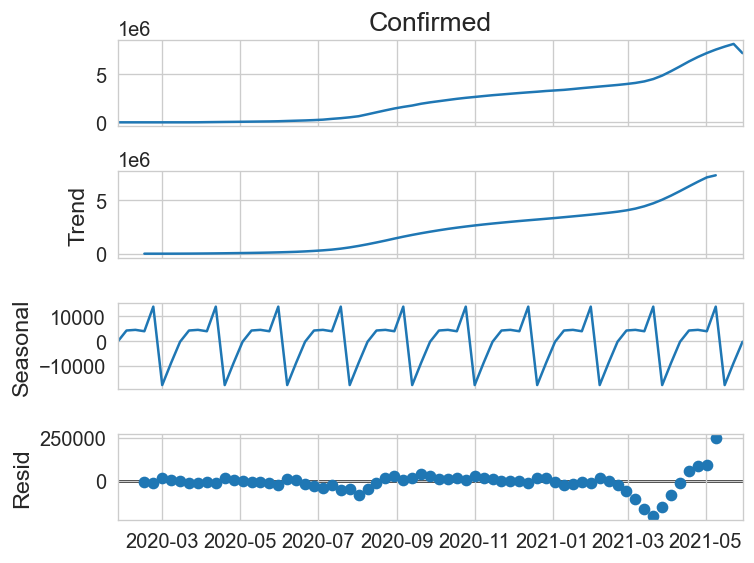

In [66]:
decomp = seasonal_decompose(ph_df, model='additive', period=7)
decomp.plot()
plt.show()

The Philippine COVID weekly time series data shows a growing trend over time and apparent seasonal patterns. This highly suggests that the data is **NONSTATIONARY**.

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Stationary Check (ADF Test)</h2>

In [67]:
adf_res = adfuller(ph_df)
print(f"ADF statistic: {adf_res[0]:.4f}")
print(f"p‑value:       {adf_res[1]:.4f}")

ADF statistic: -1.0283
p‑value:       0.7428


The ADF statistic was –1.0283, and the p‑value was 0.7428. Because the test statistic is much higher (less negative) than typical critical values (e.g. –3.43 at 1 % or –2.86 at 5 %), and the p‑value (≈ 0.74) is well above the 0.05 threshold, we **fail to reject H₀**. This test indicates that the data is nonstationary.

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Log Transformation and Differencing</h2>

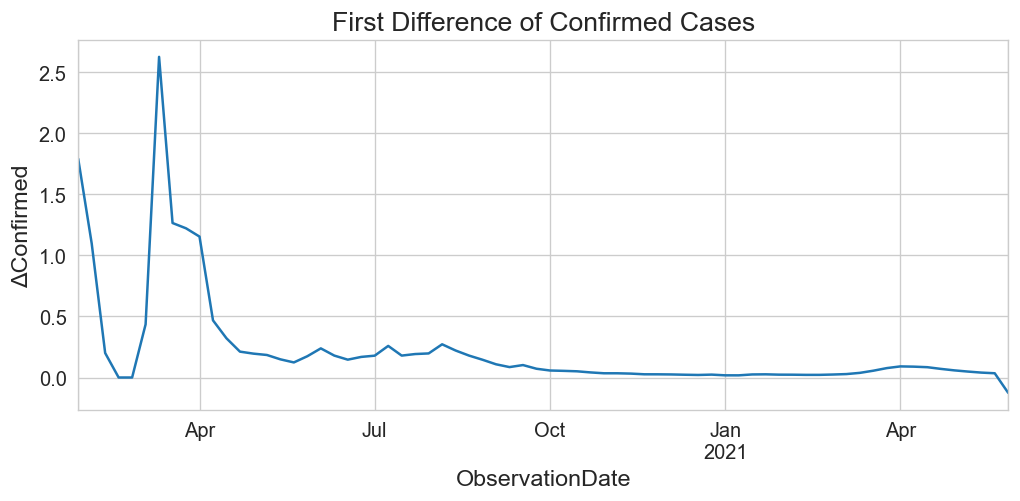

In [68]:
ph_df_log = np.log1p(ph_df)
ph_df_diff = ph_df_log.diff().dropna()

# quick plot to see if the series now “wanders” less
ph_df_diff.plot(figsize=(10,4), title="First Difference of Confirmed Cases")
plt.ylabel("ΔConfirmed")
plt.show()

In [69]:
adf_res = adfuller(ph_df_diff)
print(f"ADF statistic: {adf_res[0]:.4f}")
print(f"p‑value:       {adf_res[1]:.4f}")

ADF statistic: -2.9347
p‑value:       0.0415


After performing log transformation then first-order differencing, the p-value is now at 0.04, allowing us to reject the null hypothesis. This suggests that the data is now **stationary**.

## Model 1: ARIMA

In [70]:
m1 = ARIMA(
    ph_df_diff, 
    order=(1,0,1),
    dates=ph_df_diff.index,
    freq=ph_df_diff.index.inferred_freq
).fit()
fc1_diff = m1.get_forecast(steps=30).predicted_mean

# Revert to original scale
last_log = ph_df_log.iloc[-1]
fc1_log = fc1_diff.cumsum() + last_log
fc1 = np.expm1(fc1_log)

## Model 2: SARIMAX

In [72]:
sarima = SARIMAX(
    ph_df_log,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 7),
    dates=ph_df_log.index,
    freq=ph_df_log.index.inferred_freq,
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

fc2_log = sarima.get_forecast(steps=30).predicted_mean
fc2 = np.expm1(fc2_log)

## Model 3: Prophet

In [73]:
dfp = ph_df.reset_index().rename(columns={'ObservationDate':'ds','Confirmed':'y'})
m = Prophet(weekly_seasonality=True, daily_seasonality=False)
m.fit(dfp)
future = m.make_future_dataframe(periods=30)
pf = m.predict(future)
fc3 = pf.set_index('ds')['yhat'].iloc[-30:]

22:36:59 - cmdstanpy - INFO - Chain [1] start processing
22:36:59 - cmdstanpy - INFO - Chain [1] done processing


# Model Evaluation

In [74]:
actual = ph_df.iloc[-30:]

def eval_forecast(pred):
    mae = mean_absolute_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    return mae, rmse

results = pd.DataFrame([
    ("ARIMA",)  + eval_forecast(fc1),
    ("SARIMA",) + eval_forecast(fc2),
    ("Prophet",)+ eval_forecast(fc3),
], columns=["Model","MAE","RMSE"])

display(results)

,Model,MAE,RMSE
0,ARIMA,1.130306e+09,2.235600e+09
1,SARIMA,2.249600e+06,2.480521e+06
2,Prophet,3.845176e+06,4.096356e+06


The SARIMA(1,1,1)(1,1,1,7) model achieved the lowest MAE (2.25 M) and RMSE (2.48 M), outperforming both the non‑seasonal ARIMA by several orders of magnitude and the Prophet model by about 40 % in MAE. Prophet, with its built‑in changepoint detection and weekly seasonality, still captured much of the pattern (MAE ≈ 3.85 M) but could not match the precision of the bespoke SARIMA fit. The plain ARIMA model, lacking explicit seasonality, underfit the data, leading to extremely large forecast errors.

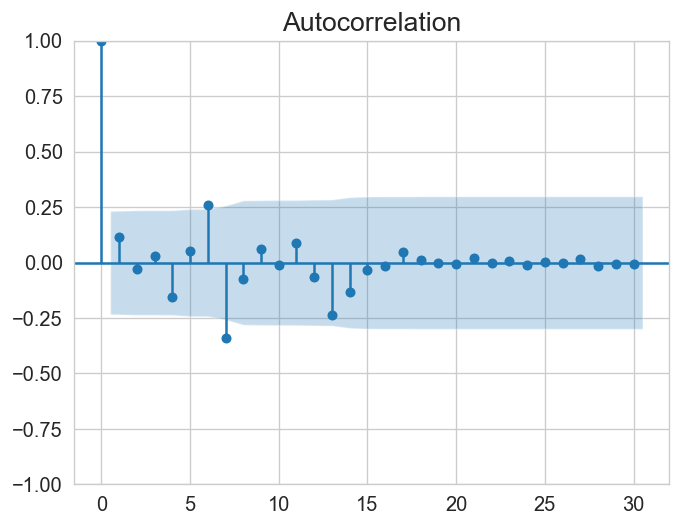

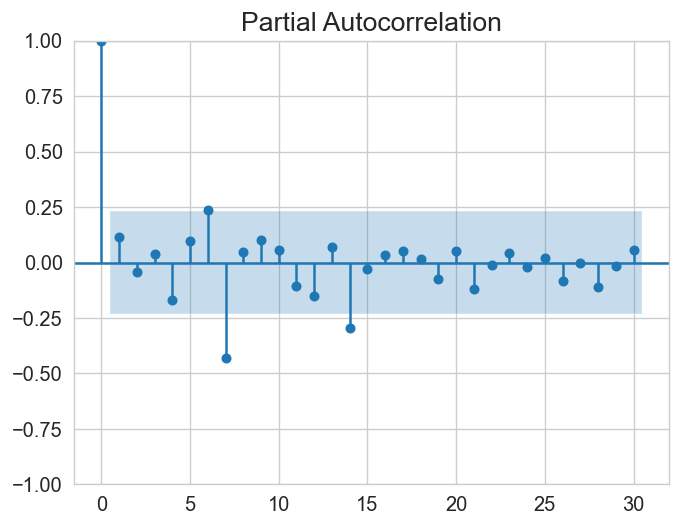

      lb_stat  lb_pvalue
10  18.766336   0.043333
20  26.796388   0.141090


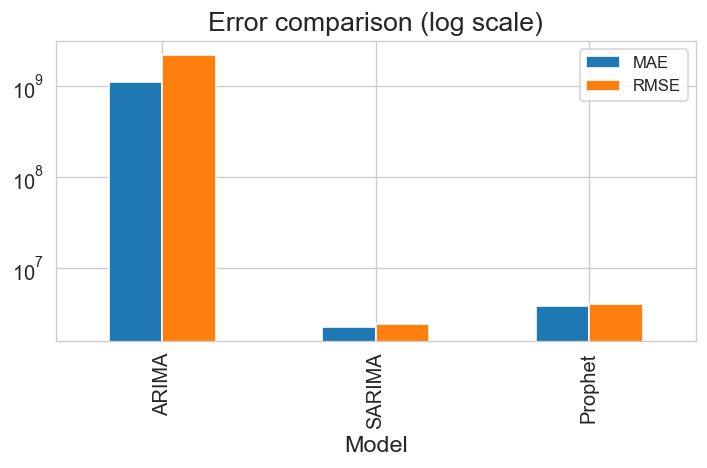

In [76]:
resid = sarima.resid

plot_acf(resid, lags=30); plt.show()
plot_pacf(resid, lags=30); plt.show()
print(acorr_ljungbox(resid, lags=[10,20], return_df=True))

# Combined metrics bar chart
metrics = results.set_index('Model')
metrics[['MAE','RMSE']].plot(kind='bar', logy=True, figsize=(6,4))
plt.title('Error comparison (log scale)')
plt.tight_layout()
plt.show()